In [1]:
#pip install pandasql

import pandas as pd
import time
from datetime import datetime

# Библиотека для финансов
import mplfinance as mpf

# Библиотеки для визуализации
import seaborn as sns
import matplotlib.pyplot as plt

# размеры графиков
plt.rcParams["figure.figsize"] = (30,10)

In [2]:
import os
print(os.getcwd())

c:\Users\LesikhinaAIu\Desktop\proj\свечи


In [3]:
candles = pd.read_csv ('candle_1MIN.csv', parse_dates=True)
#Приводим к нормальному времени
candles ['Time'] = pd.to_datetime(candles.Time, unit = 's')
candles

,Open,Close,High,Low,Value,Time
0,85.09,84.80,85.09,84.80,1967,2019-04-04 13:33:00
1,84.53,84.04,84.53,84.04,827,2019-04-04 13:35:00
2,84.13,84.00,84.18,84.00,712,2019-04-04 13:36:00
3,84.19,84.19,84.19,84.18,619,2019-04-04 13:37:00
4,84.37,84.38,84.40,84.35,328,2019-04-04 13:41:00
...,...,...,...,...,...,...
373268,58.34,58.36,58.36,58.34,25,2022-01-07 22:00:00
373269,58.96,58.97,58.97,58.96,6,2022-01-07 22:13:00
373270,58.96,59.00,59.00,58.96,5,2022-01-07 22:21:00
373271,58.39,58.17,58.39,58.17,10,2022-01-07 22:30:00


# Визуализация

## 1 minutes

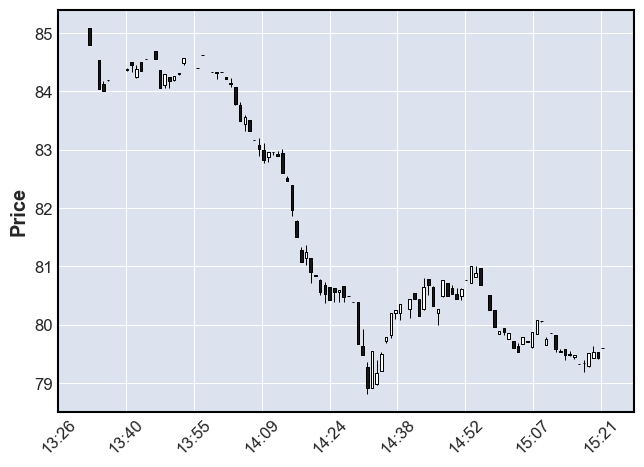

In [4]:
# Создаем 1-минутный интервал, отберем первые 100 значений
candles.index = pd.DatetimeIndex(candles['Time'])
one = candles.head(100)

mpf.plot(one,type='candle', show_nontrading=True)

## Настроим визуализацию по другим промежуткам

In [5]:
def visual (data, period, limit):

    # Создаем 15-минутный интервал, отберем первые 300 значений

    ohlc = data['Low'].resample(period).ohlc()
    # Добавляем Value
    val = data['Value'].resample(period).sum()

    # Объединяем
    ohlcv = pd.concat([ohlc,val],axis=1)
    ohlcv.columns = ohlcv.columns.str.capitalize()
    ohlcv = ohlcv.head(limit)

    mpf.plot(ohlcv,type='candle', figscale=1.75)

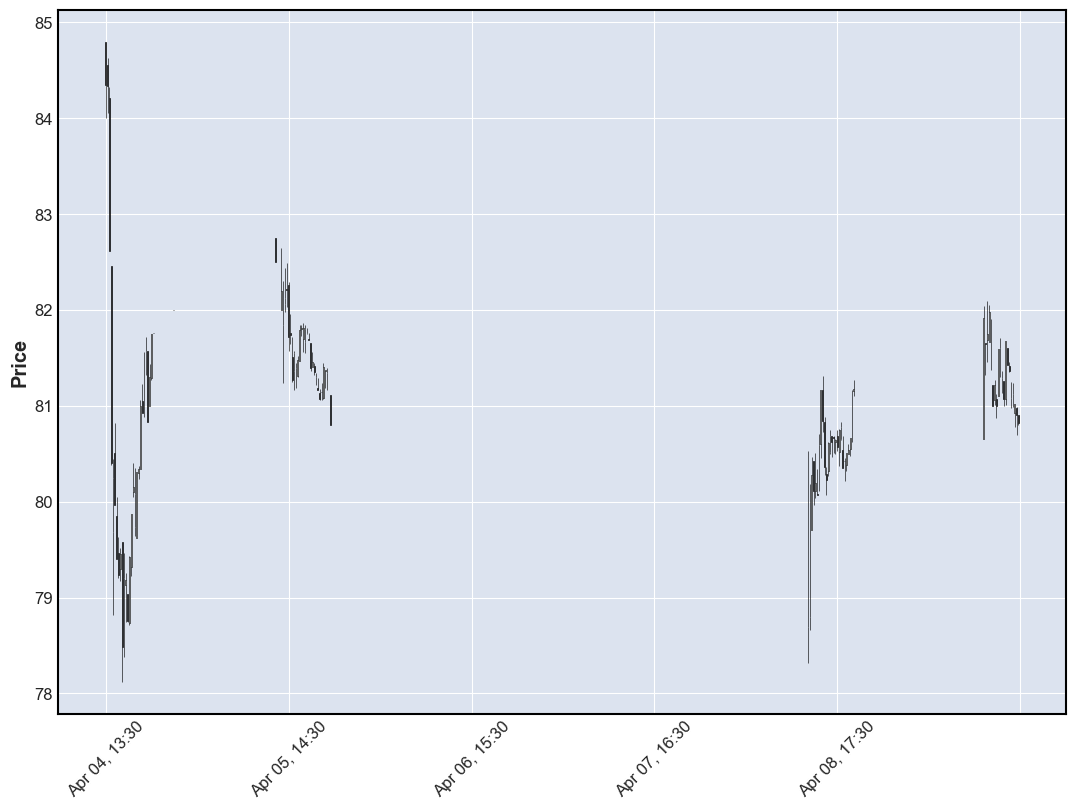

In [6]:
data = candles
period = '15T' # 30T 60T 120T ... 1d 1w 1m
limit = 500    # любое удобное ограничение по кол-ву периодов
visual (data, period, limit)

# Рассчет дельты отклонения к предыдущему дню

In [7]:
vizual = candles
vizual['Year'] = pd.DatetimeIndex(vizual['Time']).year
vizual['Month'] = pd.DatetimeIndex(vizual['Time']).month
vizual['Day'] = pd.DatetimeIndex(vizual['Time']).day
vizual
#candles.reset_index(drop= True , inplace= True )

,Open,Close,High,Low,Value,Time,Year,Month,Day
Time,,,,,,,,,
2019-04-04 13:33:00,85.09,84.80,85.09,84.80,1967,2019-04-04 13:33:00,2019,4,4
2019-04-04 13:35:00,84.53,84.04,84.53,84.04,827,2019-04-04 13:35:00,2019,4,4
2019-04-04 13:36:00,84.13,84.00,84.18,84.00,712,2019-04-04 13:36:00,2019,4,4
2019-04-04 13:37:00,84.19,84.19,84.19,84.18,619,2019-04-04 13:37:00,2019,4,4
2019-04-04 13:41:00,84.37,84.38,84.40,84.35,328,2019-04-04 13:41:00,2019,4,4
...,...,...,...,...,...,...,...,...,...
2022-01-07 22:00:00,58.34,58.36,58.36,58.34,25,2022-01-07 22:00:00,2022,1,7
2022-01-07 22:13:00,58.96,58.97,58.97,58.96,6,2022-01-07 22:13:00,2022,1,7
2022-01-07 22:21:00,58.96,59.00,59.00,58.96,5,2022-01-07 22:21:00,2022,1,7


In [8]:
# Используем для примера только 2021 год
candles_21 = candles.query('Year == 2021')
candles_21_open = candles_21.groupby(['Month', 'Day']).head(10)

#Посчитаем среднюю цену открытия по 10 первым заявкам + макс значение по 10 первым ценам открытия
candles_21_open = candles_21_open.groupby(['Month', 'Day']).agg ({'Open': ['mean', 'max']}).reset_index()
candles_21_open.rename(columns = {'mean': 'mean_open', 'max':'max_open'}, inplace = True )

candles_21_open.columns = [f'{lev2}' for lev1, lev2 in candles_21_open.columns]
candles_21_open.rename(columns = {1: 'Month', 2:'Day'}, inplace = True )

In [9]:
candles_21_open

,,,mean_open,max_open
0,1,4,123.444,124.99
1,1,5,112.104,112.58
2,1,6,112.540,112.88
3,1,7,110.724,110.99
4,1,8,116.672,117.01
...,...,...,...,...
247,12,27,63.303,63.67
248,12,28,63.018,63.13
249,12,29,61.928,62.06
250,12,30,60.621,60.82


In [10]:
# узнаем цену закрытия каждого дня

candles_21_close = candles_21.groupby(['Month', 'Day']).tail(1)
candles_21_close = candles_21_close.groupby(['Month', 'Day']).agg ({'Close': ['max']}).reset_index()
candles_21_close.rename(columns = {'max':'close_price'}, inplace = True)
candles_21_close.columns = [f'{lev2}' for lev1, lev2 in candles_21_close.columns]
candles_21_close = candles_21_close.drop(columns='') 
# смещаем значения на 1 вниз, так как для сравнения нужен предыдущий день
candles_21_close['close_price'] = candles_21_close['close_price']. shift (1)

## Таблица с дельтой по 1 минуте

In [11]:
# Объединяем таблицы
full_table = candles_21_open.join(candles_21_close)
# Дельта м/у средним и вчерашним закрытием
full_table['dalta_mean'] = (full_table['close_price'] - full_table['mean_open'])/full_table['close_price']
# Дельта м/у макисмальным и вчерашним закрытием
full_table['dalta_max'] = (full_table['close_price'] - full_table['max_open'])/full_table['close_price']
#rename all column names
full_table.columns = ['Month', 'Day', 'mean_open', 'max_open', 'close_price', 'dalta_mean', 'dalta_max']

full_table

,Month,Day,mean_open,max_open,close_price,dalta_mean,dalta_max
0,1,4,123.444,124.99,NaN,NaN,NaN
1,1,5,112.104,112.58,112.26,0.001390,-0.002851
2,1,6,112.540,112.88,113.25,0.006269,0.003267
3,1,7,110.724,110.99,110.09,-0.005759,-0.008175
4,1,8,116.672,117.01,115.35,-0.011461,-0.014391
...,...,...,...,...,...,...,...
247,12,27,63.303,63.67,63.35,0.000742,-0.005051
248,12,28,63.018,63.13,63.15,0.002090,0.000317
249,12,29,61.928,62.06,61.64,-0.004672,-0.006814
250,12,30,60.621,60.82,60.82,0.003272,0.000000


# 12 minutes

## Средняя цена открытия за первые 12 минут

In [12]:
# Используем для примера только 2021 год
open_12 = candles.query('Year == 2021')
#candles_21_12 = candles_21_12.groupby(['Month', 'Day']).head(10)
open_12 = open_12['Open'].resample('12T').ohlc()
# Добавим колонки c годом, месяцем, днем
open_12.reset_index(inplace= True)
open_12['Year'] = pd.DatetimeIndex(open_12['Time']).year
open_12['Month'] = pd.DatetimeIndex(open_12['Time']).month
open_12['Day'] = pd.DatetimeIndex(open_12['Time']).day
# выберем среднее время открытия по первым 12 минутам
open_12 = open_12.dropna()
open_12 = open_12.groupby(['Month', 'Day']).head(1)

open_12 = open_12.reset_index()
open_12 = open_12.drop(columns=['index', 'high', 'low', 'close']) 
open_12

,Time,open,Year,Month,Day
0,2021-01-04 07:00:00,123.74,2021,1,4
1,2021-01-05 07:00:00,110.37,2021,1,5
2,2021-01-06 07:00:00,111.31,2021,1,6
3,2021-01-07 07:00:00,110.99,2021,1,7
4,2021-01-08 07:00:00,115.68,2021,1,8
...,...,...,...,...,...
247,2021-12-27 04:00:00,61.70,2021,12,27
248,2021-12-28 04:00:00,63.10,2021,12,28
249,2021-12-29 04:12:00,62.04,2021,12,29
250,2021-12-30 04:12:00,60.81,2021,12,30


## Максимальная цена открытия за первые 12 минут

In [13]:
open_12_max = candles.query('Year == 2021')
open_12_max = open_12_max.groupby(['Month', 'Day']).head(12)
open_12_max = open_12_max.groupby(['Month', 'Day']).agg ({'Open': ['max']}).reset_index()
open_12_max.rename(columns = {'max':'max_open'}, inplace = True)
open_12_max.columns = [f'{lev2}' for lev1, lev2 in open_12_max.columns]
open_12_max = open_12_max.drop(columns='') 
open_12_max

,max_open
0,124.99
1,112.58
2,112.89
3,110.99
4,117.13
...,...
247,63.67
248,63.13
249,62.06
250,60.82


## Таблица с дельтой по 12-ти минутам

In [14]:
# Цену закрытия по каждому дню используем candles_21_close
full_table_12 = open_12.join(candles_21_close)
full_table_12 = full_table_12.join(open_12_max)

# Дельта м/у средним и вчерашним закрытием
full_table_12['dalta_mean'] = (full_table_12['close_price'] - full_table_12['open'])/full_table_12['close_price']
# Дельта м/у макисмальным и вчерашним закрытием
full_table_12['dalta_max'] = (full_table_12['close_price'] - full_table_12['max_open'])/full_table_12['close_price']
#rename all column names
#full_table_12.columns = ['Month', 'Day', 'mean_open', 'max_open', 'close_price', 'dalta_mean', 'dalta_max']
# удалим ненужные столбцы
full_table_12 = full_table_12.drop(columns=['Year', 'Time'])
full_table_12 = full_table_12[['Month', 'Day', 'open', 'max_open', 'close_price', 'dalta_mean', 'dalta_max']]
#rename all column names
full_table.columns = ['Month', 'Day', 'mean_open', 'max_open', 'close_price', 'dalta_mean', 'dalta_max']
full_table_12

,Month,Day,open,max_open,close_price,dalta_mean,dalta_max
0,1,4,123.74,124.99,NaN,NaN,NaN
1,1,5,110.37,112.58,112.26,0.016836,-0.002851
2,1,6,111.31,112.89,113.25,0.017130,0.003179
3,1,7,110.99,110.99,110.09,-0.008175,-0.008175
4,1,8,115.68,117.13,115.35,-0.002861,-0.015431
...,...,...,...,...,...,...,...
247,12,27,61.70,63.67,63.35,0.026046,-0.005051
248,12,28,63.10,63.13,63.15,0.000792,0.000317
249,12,29,62.04,62.06,61.64,-0.006489,-0.006814
250,12,30,60.81,60.82,60.82,0.000164,0.000000
